In [3]:
! pip install newspaper3k -q
! pip install -U spacy -q
! pip install afinn -q
! pip install spacytextblob -q
! pip install pysrt -q
! pip install textdescriptives -q
! pip install tokenwiser -q
! pip install gensim -q

In [4]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# text imports
import spacy
from spacy import cli
from spacytextblob.spacytextblob import SpacyTextBlob
import textdescriptives as td
import tokenwiser

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

import gensim

from afinn import Afinn
from newspaper import Article

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
import pysrt
subs = pysrt.open('Shrek-2001.srt', encoding='iso-8859-1')

In [19]:
len(subs)

1097

In [22]:
corpus= []
for x in range(len(subs)):
    corpus.append(subs[x].text)
    

In [26]:
afinn = Afinn("en")
sents = [afinn.score(doc) for doc in corpus]

In [27]:
sents[:3]

[3.0, -2.0, 4.0]

In [28]:
df = pd.DataFrame({'scene':corpus, 'sents':sents})

In [35]:
from nltk.tokenize import word_tokenize, RegexpTokenizer, WordPunctTokenizer, TweetTokenizer

def parser(text):
  return nltk.word_tokenize(text)

In [37]:
cv = CountVectorizer(tokenizer=parser)
cv.fit(corpus)

CountVectorizer(tokenizer=<function parser at 0x00000288F251C670>)

In [40]:
dtm = cv.transform(corpus)
shrek_df = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())

In [41]:
shrek_df.sample(1)

,!,','','cause,'course,'d,'digged,'ll,'m,'re,...,yeah,years,yes,yesterday,yet,you,young,your,yours,yourself
410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [44]:
SQL = "SELECT * FROM `questrom.datasets.airlines-tweets`"
YOUR_BILLING_PROJECT = "ba820-329602"
tweets = pd.read_gbq(SQL, YOUR_BILLING_PROJECT)

In [46]:
from nltk import Text

tweet_text = tweets.text.tolist()

corpus = " ".join(tweet_text)

tokens = nltk.word_tokenize(corpus)
len(tokens)

text = Text(tokens)

In [49]:
text.concordance("flight", width=80, lines=10)

Displaying 10 of 3902 matches:
lz help me win my bid upgrade for my flight 2/27 LAX -- - & gt ; SEA ! ! ! 🍷👍💺✈️
y elevate account for my most recent flight , how do i add the flight and points
ost recent flight , how do i add the flight and points to my account ? @ VirginA
 my account ? @ VirginAmerica why is flight 345 redirected ? @ VirginAmerica try
merica I was scheduled for SFO 2 DAL flight 714 today . Changed to 24th due weat
ged to 24th due weather . Looks like flight still on ? @ VirginAmerica Have a gr
nonstop . Thanks for such an awesome flight and depart time . # VAbeatsJblue @ V
 . # VAbeatsJblue @ VirginAmerica is flight 882 Cancelled Flightled and what do 
g back online ? @ VirginAmerica - Is Flight 713 from Love Field to SFO definitel
y , February 23 ? @ VirginAmerica Is flight 0769 out of LGA to DFW on time ? @ V


In [50]:
model = "en_core_web_sm"
cli.download(model)
nlp = spacy.load(model)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [53]:
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'spacytextblob',
 'descriptive_stats',
 'readability',
 'dependency_distance',
 'pos_stats',
 'textdescriptives']

In [51]:
nlp.add_pipe("spacytextblob")
nlp.add_pipe("textdescriptives")

In [52]:
docs = nlp.pipe(tweets.text.sample(100, random_state=820))

In [54]:
tweets_df = td.extract_df(docs)

In [56]:
tweets_df.shape
tweets_df.head(3)

,text,token_length_mean,token_length_median,token_length_std,sentence_length_mean,sentence_length_median,sentence_length_std,syllables_per_token_mean,syllables_per_token_median,syllables_per_token_std,...,pos_prop_CCONJ,pos_prop_SCONJ,pos_prop_DET,pos_prop_ADJ,pos_prop_PROPN,pos_prop_ADP,pos_prop_ADV,pos_prop_SYM,pos_prop_SPACE,pos_prop_INTJ
0,@AmericanAir ...2/2 doesn't help me.,5.000000,4.0,3.577709,5.0,5.0,0.0,1.400000,1.0,0.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,@USAirways and if the flight is full?,4.285714,3.0,2.657296,7.0,7.0,0.0,1.285714,1.0,0.699854,...,0.125000,0.125,0.125000,0.125000,NaN,NaN,NaN,NaN,NaN,NaN
2,@SouthwestAir Gate attendant at McCarran C16 (...,4.909091,4.0,3.028787,11.0,11.0,2.0,1.545455,1.0,0.782030,...,0.038462,NaN,0.038462,0.076923,0.192308,0.192308,0.038462,NaN,NaN,NaN


In [57]:
tweets_df.gunning_fog.describe()

count    100.000000
mean       8.235409
std        3.923389
min        0.800000
25%        5.657143
50%        8.133333
75%       10.942944
max       20.584615
Name: gunning_fog, dtype: float64

<AxesSubplot:xlabel='gunning_fog', ylabel='coleman_liau_index'>

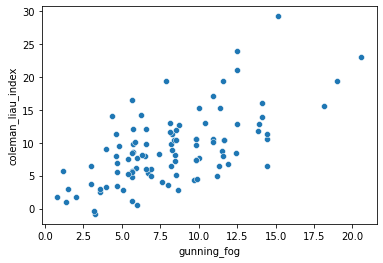

In [58]:
sns.scatterplot(x="gunning_fog", y="coleman_liau_index", data=tweets_df)

In [77]:
URL1 = "https://www.bbc.com/culture/article/20211117-why-u2s-one-is-the-ultimate-anthem"
URL2 = "https://www.theonion.com/dollar-dangling-from-fishing-line-sure-does-look-entici-1848019332"
URL3 = "https://www.nytimes.com/2021/11/20/world/china-congo-cobalt-explained.html"

article = []

article1 = Article(URL1)
article1.download()
article1.parse()
article1.nlp()
article.append(article1.text)


article2 = Article(URL2)
article2.download()
article2.parse()
article2.nlp()
article.append(article2.text)

article3 = Article(URL3)
article3.download()
article3.parse()
article3.nlp()
article.append(article3.text)

In [71]:
docs = nlp.pipe(article)
tweets_df = td.extract_df(docs, metrics="readability")


In [72]:
tweets_df

,text,flesch_reading_ease,flesch_kincaid_grade,smog,gunning_fog,automated_readability_index,coleman_liau_index,lix,rix
0,The song continued to evolve during the Zoo TV...,75.029716,8.259602,10.052491,11.470455,9.741378,8.036648,40.039773,3.96875
1,"BRATTLEBORO, VT—Rubbing his hands together in ...",78.313636,8.191948,8.418075,10.883117,9.709532,7.105697,36.298701,3.00000
2,The five biggest Chinese mining companies in C...,69.606379,8.022337,10.924579,11.337931,10.353046,10.998084,43.670498,4.62069


In [82]:
from tokenwiser.extension import sklearn_method

SQL = "SELECT * from `questrom.SMSspam.train`"
YOUR_BILLING_PROJECT = "ba820-329602"
train = pd.read_gbq(SQL, YOUR_BILLING_PROJECT)

In [84]:
train.sample(2)

,message,label,id
2131,"Probably not, still going over some stuff here",ham,2785
3172,Im just wondering what your doing right now?,ham,4166


In [86]:
steps = [("cv", CountVectorizer()), 
         ("clf", DecisionTreeClassifier(max_depth=7, 
                                        min_samples_leaf=15, 
                                        min_samples_split=30, 
                                        random_state=820))]

pipe = Pipeline(steps)

In [87]:
pipe.fit(train.message, train.label)

Pipeline(steps=[('cv', CountVectorizer()),
                ('clf',
                 DecisionTreeClassifier(max_depth=7, min_samples_leaf=15,
                                        min_samples_split=30,
                                        random_state=820))])

In [100]:
sms = "Hey, how are you?"

pipe.predict_proba([sms])
pipe.classes_

array(['ham', 'spam'], dtype=object)

In [101]:
from spacy.tokens import Doc
Doc.set_extension("spam", getter=sklearn_method(pipe))

In [102]:
doc = nlp(sms)

In [104]:
doc._.spam

{'ham': 0.9760918074593561, 'spam': 0.023908192540643927}

In [107]:
def spam_cat(doc):
  label = pipe.predict([doc.text[0]])
  label = str(label[0])
  return label

Doc.set_extension("label_spam", getter=spam_cat)

In [108]:
doc = nlp(sms)

In [109]:
doc._.label_spam

'ham'